# Decision Tree
- 2020-2 Artifitial Intelligence  
- week3 Assignment  
- Updated 0919
- 아이리스 분류 데이터로 의사결정트리 만들기


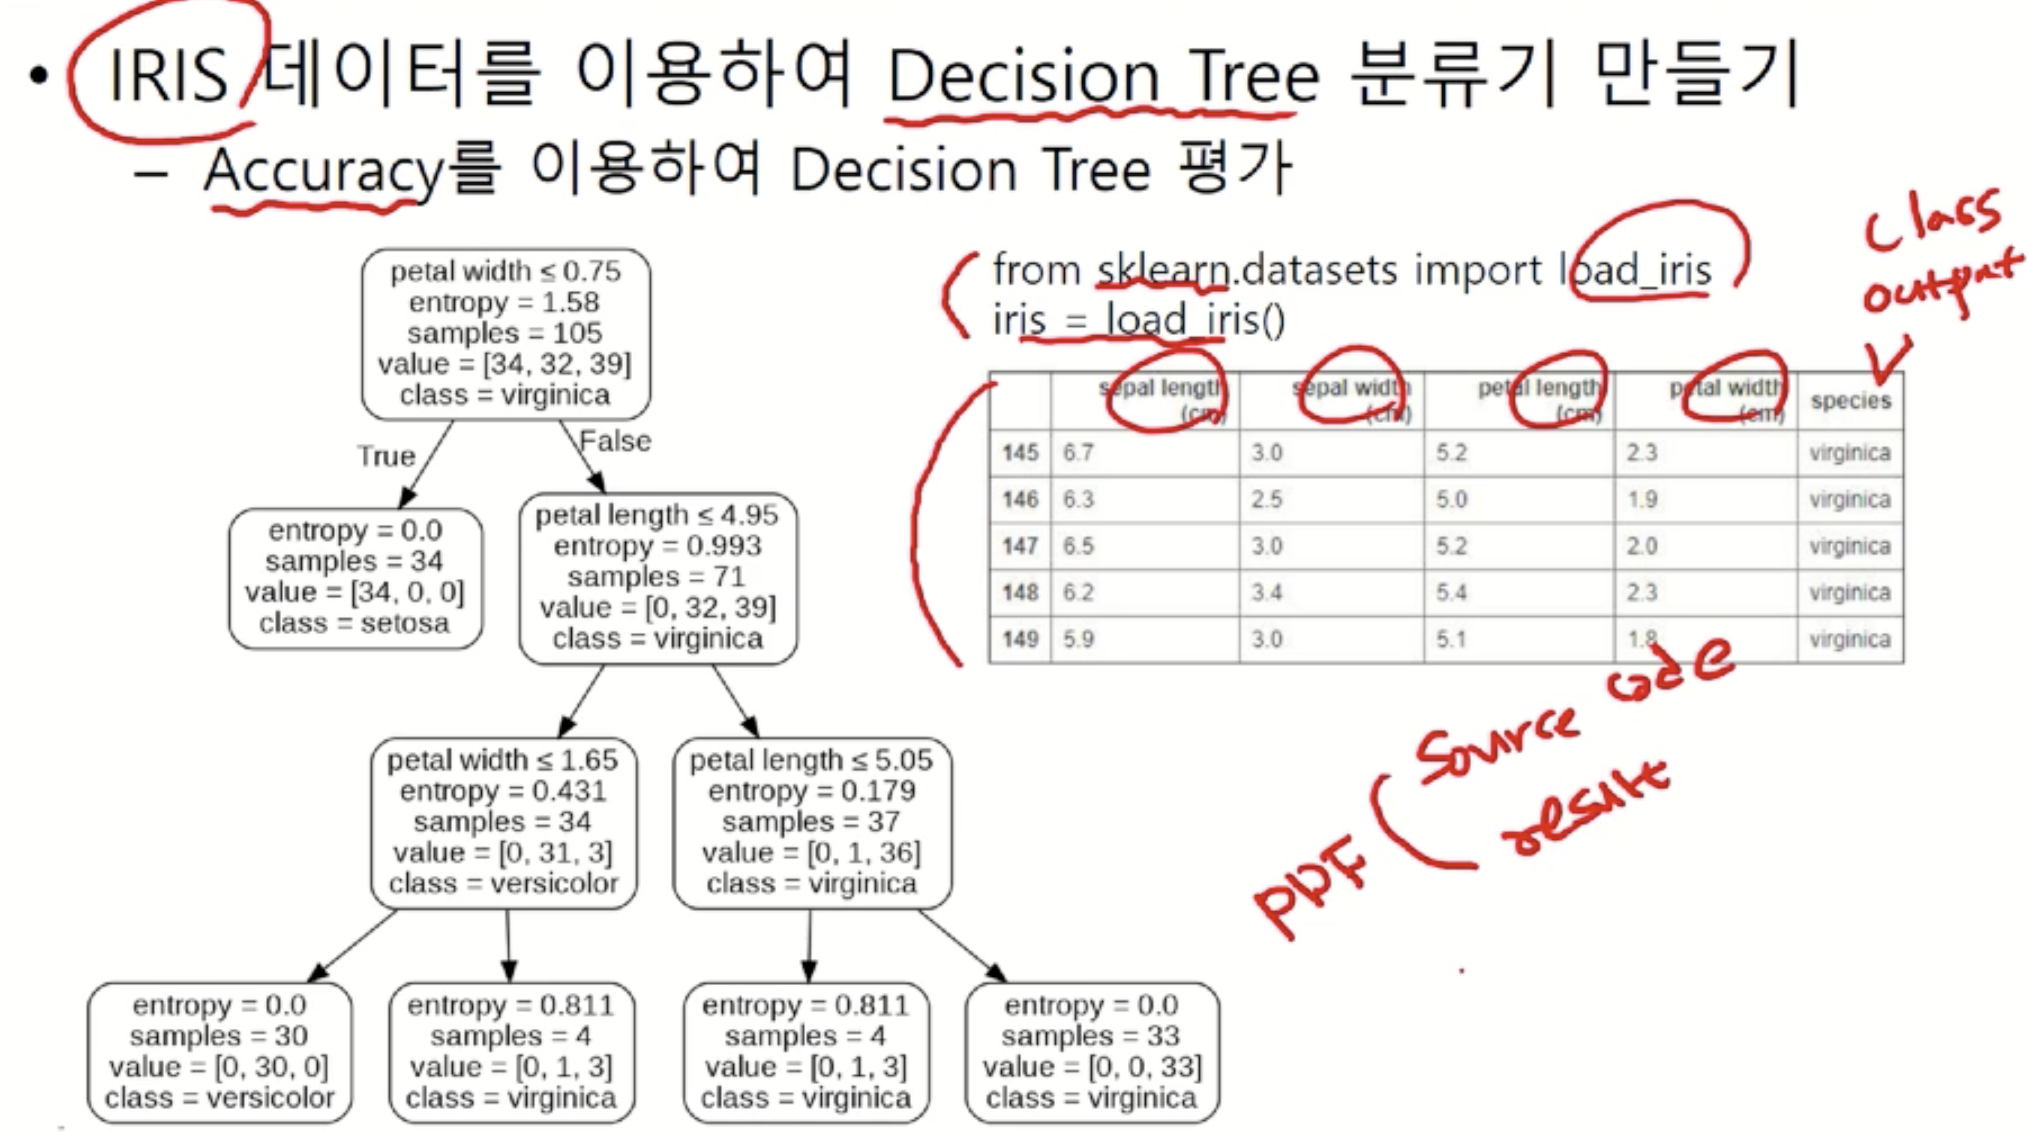

In [20]:
# ready
import pandas as pd
import numpy as np

import sys
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# visualization
from matplotlib import pyplot as plt

### step1. Load data
사이킷런 내장 데이터 아이리스 데이터를 가져온다.

In [21]:
from sklearn.datasets import load_iris
# dataframe 으로 가져오기
iris = load_iris()
df_iris = pd.DataFrame(data = np.c_[iris['data'],iris['target']],
                 columns=iris['feature_names']+['target'])
print(df_iris.shape)
df_iris.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [22]:
# target 데이터 타입 및 분포 파악
df_iris.target.value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

### step2. Split data
train test split

In [23]:
from sklearn.model_selection import train_test_split 

In [24]:
# Define X & y
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

# split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### step3. Decision tree 
의사결정나무 분류기

In [25]:
from sklearn import tree

# 정의
clf = tree.DecisionTreeClassifier()
# fitting
clf = clf.fit(X_train,y_train)

### step4. Evaluate
train data로 학습된 분류기로 accuaracy를 평가해본다.

In [26]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('accuracy : ',acc)

accuracy :  1.0


In [27]:
print(y_test[:5])
print(y_pred[:5])

73     1.0
18     0.0
118    2.0
78     1.0
76     1.0
Name: target, dtype: float64
[1. 0. 2. 1. 1.]


y_pred 를 y_test 와 비교한 결과, 완벽하게 맞추고 있기 때문에 accuracy 결과가 1.0 으로 나온다.  
(100% 올바르게 분류 중)

### step5.Visualization
tree 구조를 시각화 해보고, featrue importance를 그려본다.


[Text(103.01538461538462, 201.90857142857143, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Tex

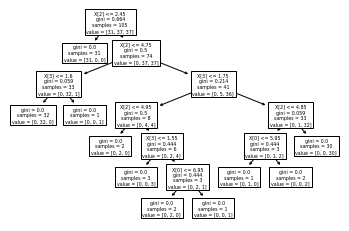

In [28]:
# tree Architecture 
tree.plot_tree(clf)

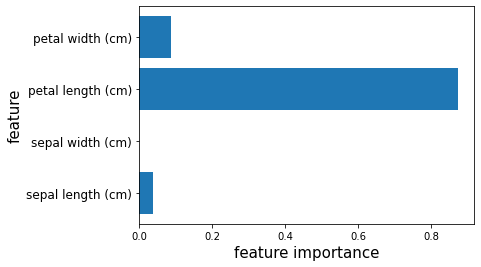

In [29]:
# tree feature imporatance
feature_importance = clf.feature_importances_
feature_name = list(X.columns)

n_feature = X_train.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()